### Visualizing QAOA Landscapes at Higher Depths

In this notebook, we use the provided functions to build and visualize the QAOA landscape at a specific depth, `p`. You can adjust the value of `p` and the fixed beta values for layers 1 to `p-1` to explore different scenarios.

#### Instructions:

1. Modify the `G` variable to create your graph.
2. Specify the value of `p` to set the depth of the QAOA circuit.
3. Optionally, specify the `fixed_betas` list to fix the beta values for layers 1 to `p-1`.
4. Run the code cell to generate the landscape data.

#### Visualizing the Landscape:

Below, we visualize the landscape for layer `p` based on the specified parameters.

5. **Run the Notebook**: Save the notebook and run all the cells sequentially. You can modify the parameters as needed and visualize the QAOA landscape for different scenarios.

By following these steps, you'll have a Jupyter Notebook that provides a user-friendly interface for visualizing QAOA landscapes at higher depths and allows you to easily experiment with different parameters.


In [3]:
import math
import numpy as np
import pandas as pd
import networkx as nx
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm

from mpl_toolkits.mplot3d import Axes3D
from concurrent.futures import ProcessPoolExecutor, as_completed
from qiskit import QuantumCircuit, Aer, execute
from qiskit.algorithms.optimizers import ADAM
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit.utils import QuantumInstance
from qiskit_optimization.applications import Maxcut
from qiskit.opflow import AerPauliExpectation, PauliSumOp
from qiskit.quantum_info import Statevector
from qiskit.circuit import Parameter

# Custom imports
from haqc.parallel.landscape_parallel import parallel_computation_n_layers_fixed
from haqc.generators.graph_instance import create_graphs_from_all_sources
from haqc.generators.parameter import get_optimal_parameters
from haqc.plot.landscape import plot_landscape
from haqc.exp_utils import str2bool, to_snake_case, make_temp_directory, check_boto3_credentials


df = pd.read_csv("../data/optimal-parameters.csv")


# Set a global style
plt.style.use('default')

# Visualising `p=1`

In [2]:
with open('landscape_data_storage.pkl', 'rb') as f:
    d_landscape = pickle.load(f)
print(d_landscape.keys())

dict_keys(['Graph_1_Uniform Random', 'Graph_2_Power Law Tree', 'Graph_3_Watts-Strogatz small world', 'Graph_4_Geometric', 'Graph_5_Nearly Complete BiPartite', 'Graph_6_3-Regular Graph', 'Graph_7_4-Regular Graph', 'Graph_8_4-Regular Graph Fixed Weights'])


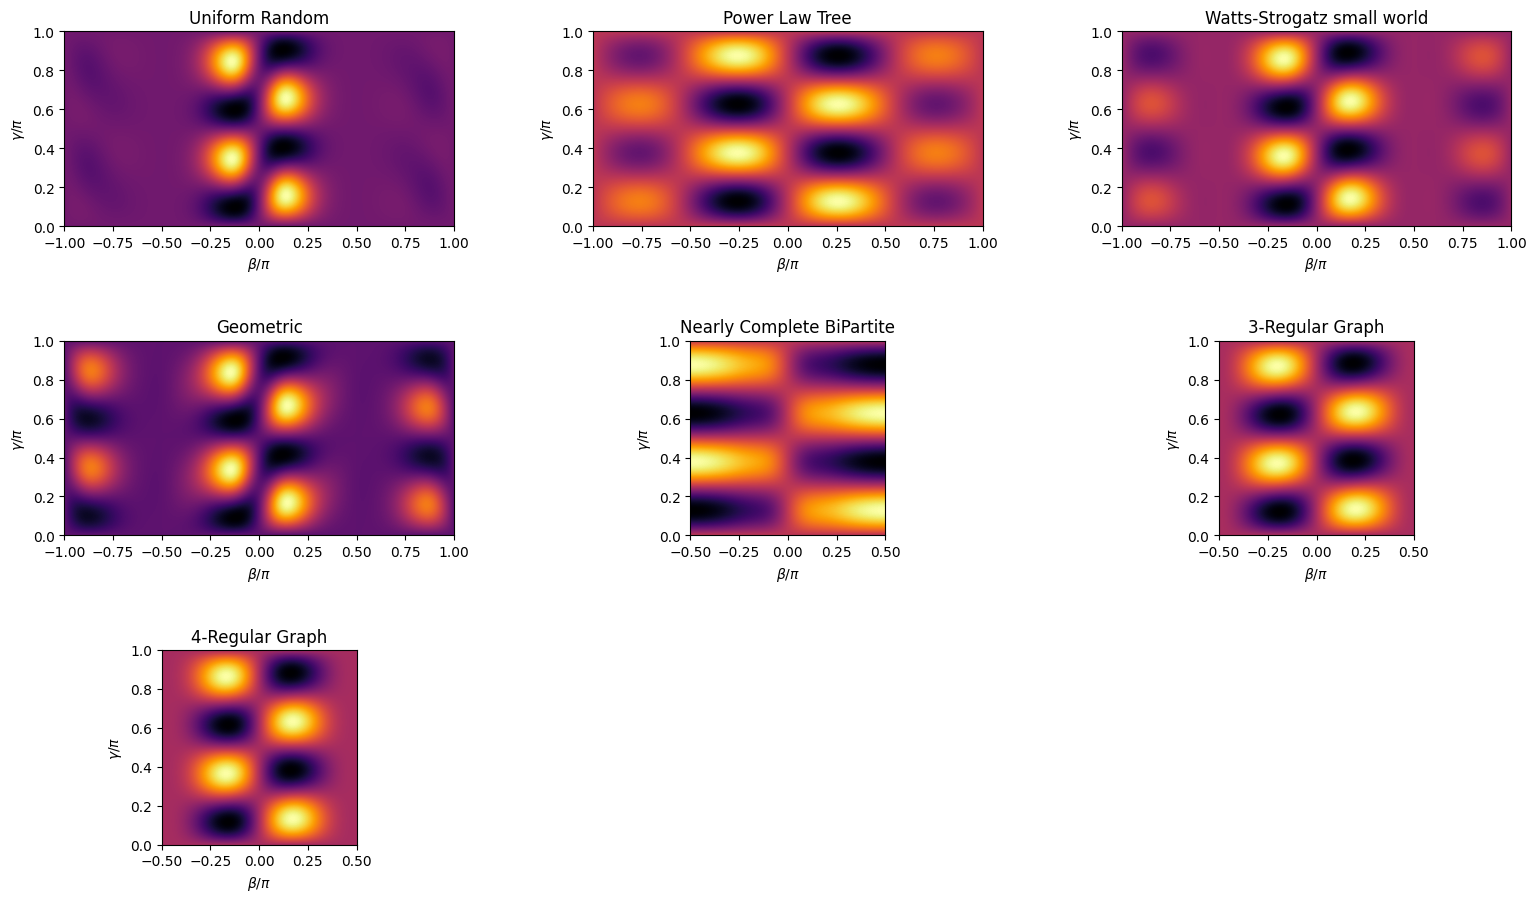

In [3]:
# Create a figure with a grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(16,9))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# Loop through the stored landscape data and create subplots
for idx, (graph_key, landscape_data) in enumerate(d_landscape.items()):
    if graph_key != "Graph_8_4-Regular Graph Fixed Weights":
        ax = axs[idx]

        # Extract data for plotting
        beta = landscape_data['beta']/ np.pi
        gamma = landscape_data['gamma']/ np.pi
        obj_vals = landscape_data['obj_vals']

    #     # Plotting the data
        im = ax.imshow(obj_vals.T, origin='lower', cmap='inferno', extent=(beta[0], beta[-1], gamma[0], gamma[-1]))
        ax.set_xlabel(r'$\beta / \pi$')
        ax.set_ylabel(r'$\gamma / \pi$')
        title = '_'.join(graph_key.split('_')[2:])
        ax.set_title(f"{title}")

# # Remove unused axes if the number of plots is less than the number of subplots
for idx in range(len(d_landscape)-1, len(axs)):
    fig.delaxes(axs[idx])
    axs[idx].set_visible(False)  # This will ensure the axis is not visible at all

# # Adjust the layout of the subplots, adding more space between them
# Adjust the layout of the subplots, reducing the vertical space between them
fig.tight_layout(pad=1.0, h_pad=4, w_pad=1.0)  # Adjust h_pad for vertical spacing


# # Save the entire grid plot
plt.savefig("landscape_grid.png", dpi=300)


## Landscape Plot using 3-regular graph optimized params
We use the parameters we found for 3-regular graphs and use them across all instances

Guess 1 for producing a connected Geometric Graph with r=0.4887463383520236 - connected: True
Adding edge (3,0)
Adding edge (3,2)
Regenerating p
Adding edge (3,0)


/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/1610540991.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [3:09:03<00:00, 14.10it/s]


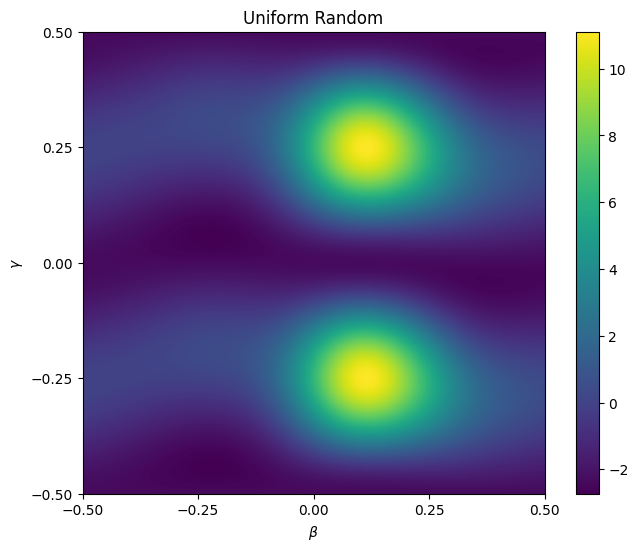

/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/1610540991.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [2:03:22<00:00, 21.61it/s]


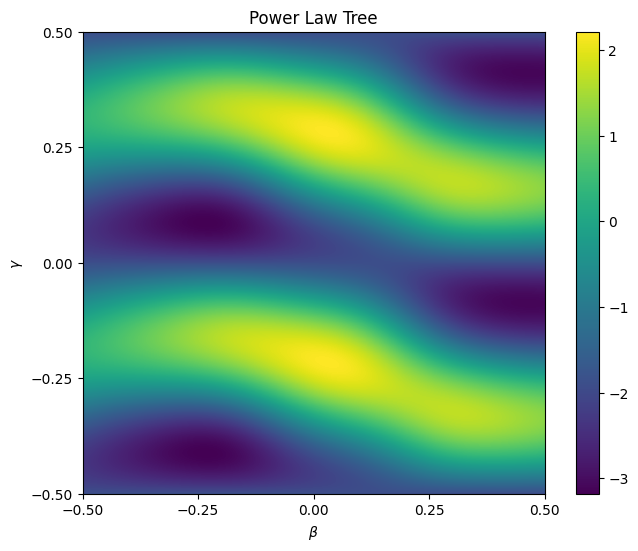

/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/1610540991.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [2:39:05<00:00, 16.76it/s]


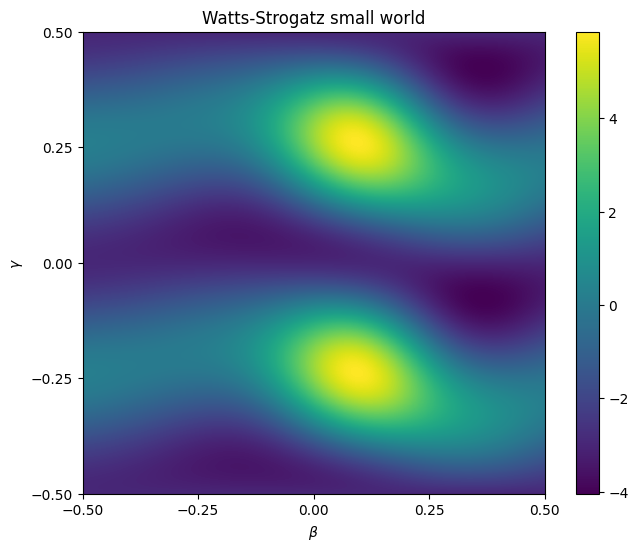

/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/1610540991.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [3:17:31<00:00, 13.50it/s]


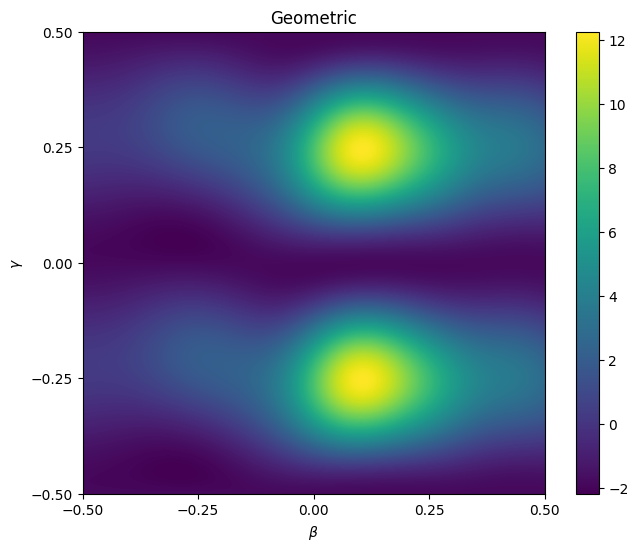

/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/1610540991.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [3:01:27<00:00, 14.70it/s]


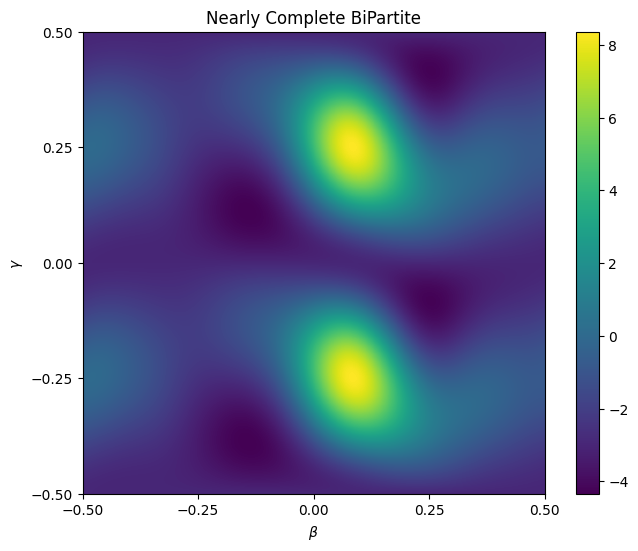

/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/1610540991.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [2:23:15<00:00, 18.61it/s]


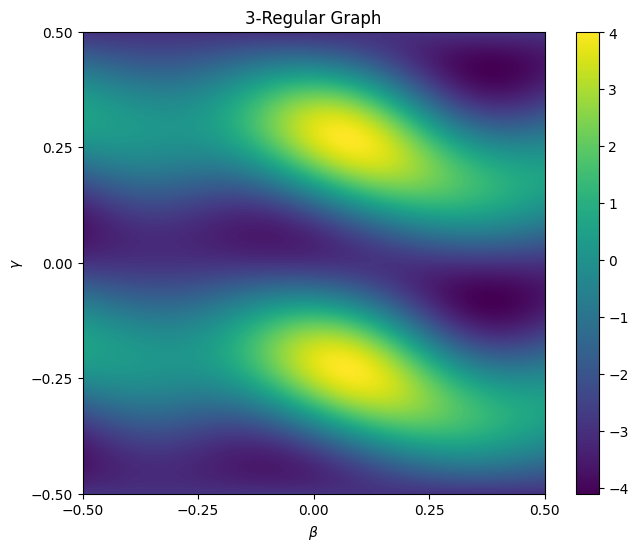

/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/1610540991.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [2:39:35<00:00, 16.71it/s]


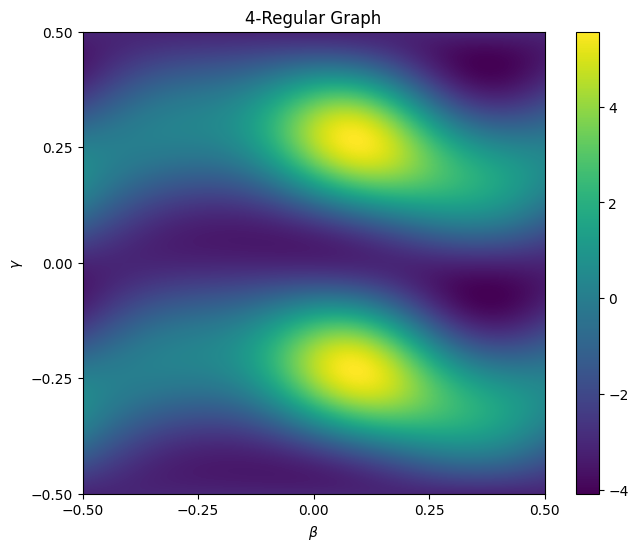

/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/1610540991.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [2:42:47<00:00, 16.38it/s]


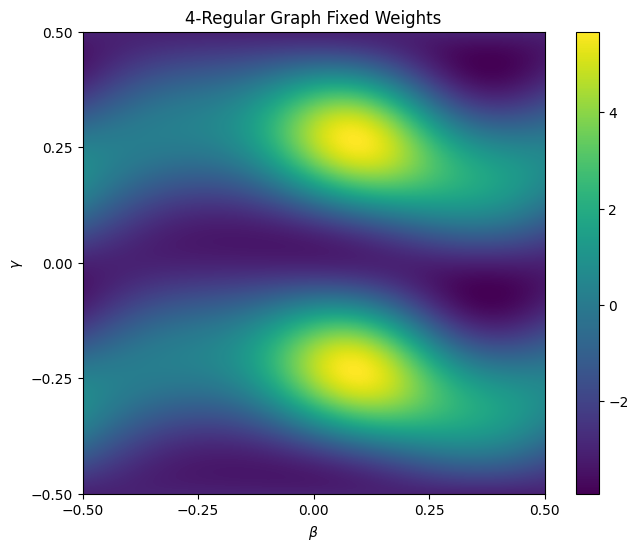

In [53]:
node_size = 12
G_instances = create_graphs_from_all_sources(instance_size=node_size, sources="ALL")

N_LAYERS = 2
optimal_params = get_optimal_parameters("three_regular_graph", n_layers=(N_LAYERS-1), df=df)
fixed_betas = optimal_params["beta"]
fixed_gammas = optimal_params["gamma"]

assert(len(fixed_betas)+1 == N_LAYERS)
assert(len(fixed_gammas)+1 == N_LAYERS)

beta = np.linspace(-np.pi / 2, np.pi / 2, 400)
gamma = np.linspace(-np.pi / 2, np.pi / 2, 400)

# Loop through each graph instance
for instance in G_instances:
    G = instance.G  # Current graph instance

    adjacency_matrix = nx.adjacency_matrix(G)
    max_cut = Maxcut(adjacency_matrix)
    qubitOp, offset = max_cut.to_quadratic_program().to_ising()

    qaoa = QAOA(optimizer=ADAM(), reps=N_LAYERS)
    obj_vals = parallel_computation_n_layers_fixed(beta=beta, gamma=gamma, fixed_gammas=fixed_gammas, fixed_betas=fixed_betas, qubitOp=qubitOp, qaoa=qaoa)

    landscape_data = {"beta": beta, "gamma": gamma, "obj_vals": obj_vals}
    plot_landscape(landscape_data, source=instance.graph_type)

## Landscape Plot using instance-class based params
We use the parameters we found for instance class based graphs and use them across all instances

/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/2133954396.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [3:09:19<00:00, 14.09it/s]


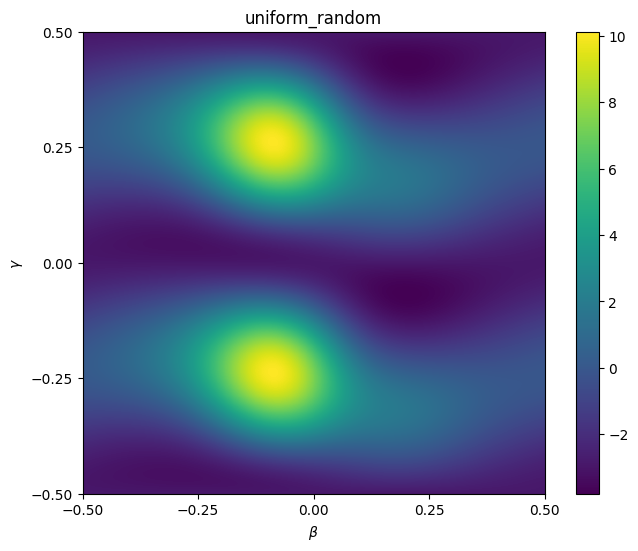

/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/2133954396.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [2:03:22<00:00, 21.61it/s]


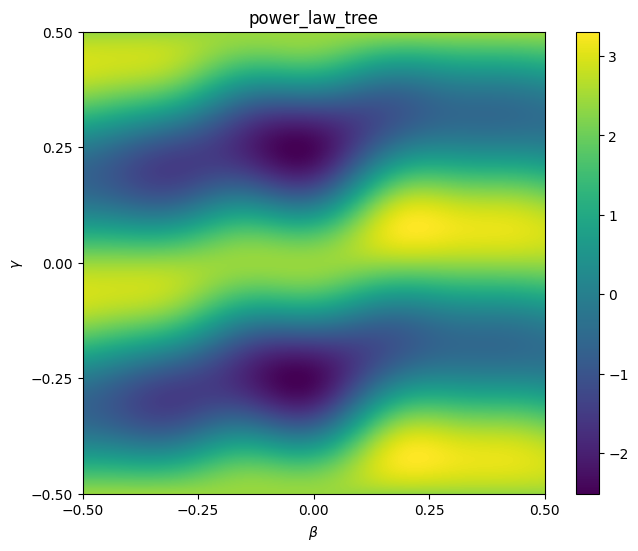

/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/2133954396.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [2:38:37<00:00, 16.81it/s]


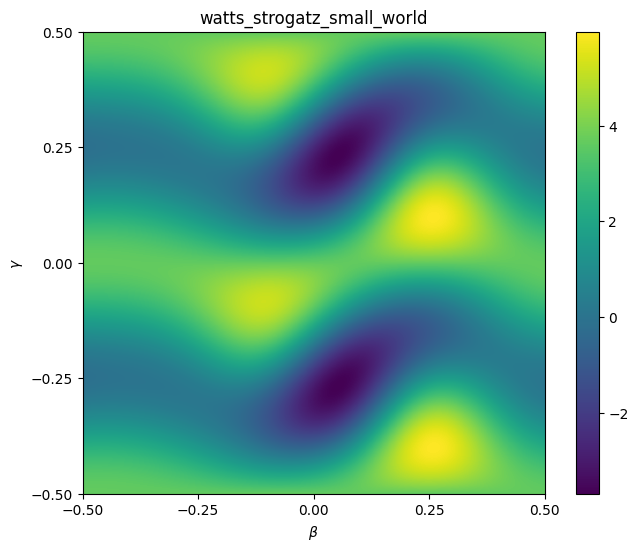

/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/2133954396.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [3:18:02<00:00, 13.47it/s]


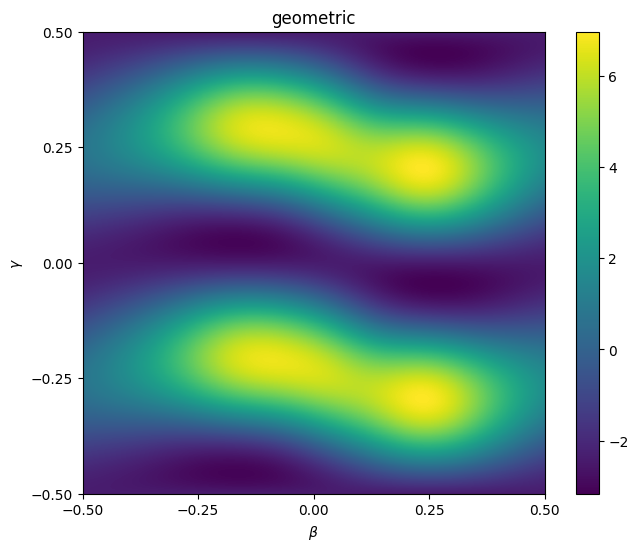

/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/2133954396.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [3:01:27<00:00, 14.70it/s]


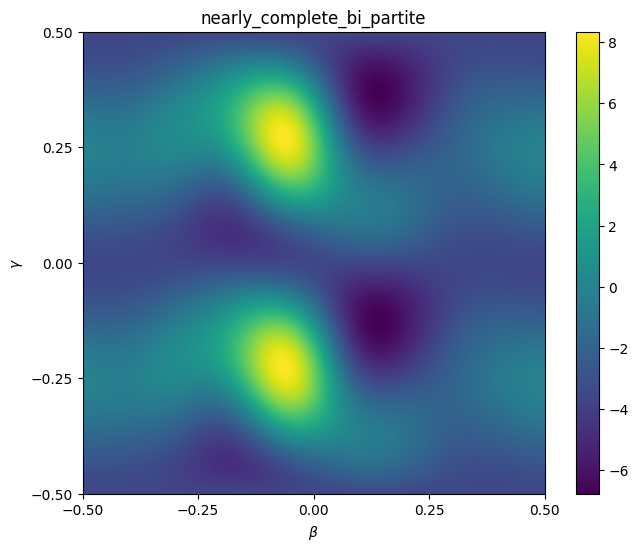

/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/2133954396.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [4:17:41<00:00, 10.35it/s]


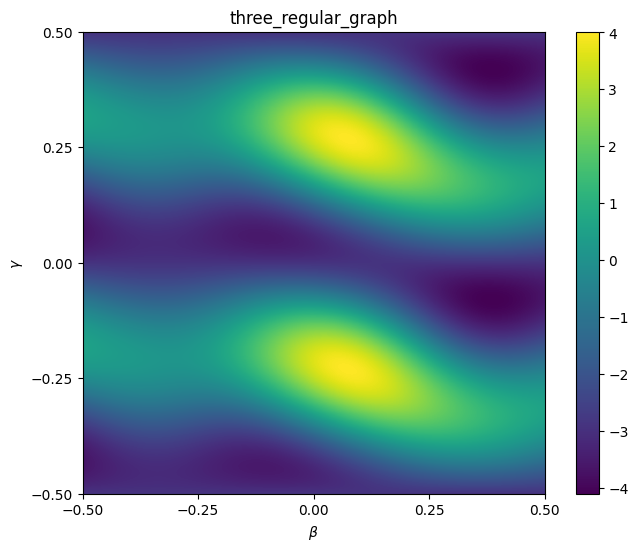

/var/folders/gb/rc_0v1v93713yw2vssbh8vw40000gn/T/ipykernel_87475/2133954396.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)
Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160000/160000 [2:38:13<00:00, 16.85it/s]


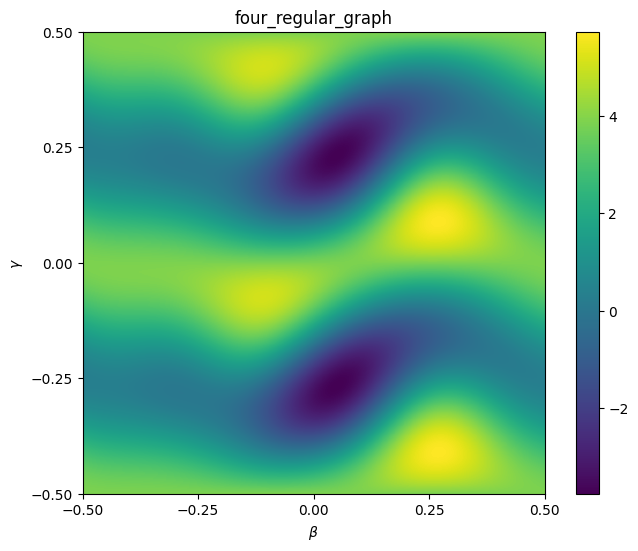

TypeError: string indices must be integers

In [56]:
N_LAYERS = 2
beta = np.linspace(-np.pi / 2, np.pi / 2, 400)
gamma = np.linspace(-np.pi / 2, np.pi / 2, 400)

# Loop through each graph instance
for instance in G_instances:
    G = instance.G  # Current graph instance

    # Convert graph type to snake case
    instance_class = to_snake_case(instance.graph_type)

    # Fetch or calculate optimal parameters for the current graph type
    optimal_params = get_optimal_parameters(instance_class, n_layers=(N_LAYERS-1), df=df)
    fixed_betas = optimal_params["beta"]
    fixed_gammas = optimal_params["gamma"]

    assert(len(fixed_betas)+1 == N_LAYERS)
    assert(len(fixed_gammas)+1 == N_LAYERS)

    adjacency_matrix = nx.adjacency_matrix(G)
    max_cut = Maxcut(adjacency_matrix)
    qubitOp, offset = max_cut.to_quadratic_program().to_ising()

    qaoa = QAOA(optimizer=ADAM(), reps=N_LAYERS)
    obj_vals = parallel_computation_n_layers_fixed(beta=beta, gamma=gamma, fixed_gammas=fixed_gammas, fixed_betas=fixed_betas, qubitOp=qubitOp, qaoa=qaoa)

    landscape_data = {"beta": beta, "gamma": gamma, "obj_vals": obj_vals}
    plot_landscape(landscape_data, source=instance_class)
